In [1]:
import models.get_model
import torch
from utils.loader import DicomDataset3D
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import utils.notebooks as nb

In [2]:
training_data= DicomDataset3D("data/train.csv")
train_dataloader = DataLoader(training_data, batch_size=10)

inputs shape: torch.Size([10, 1, 91, 512, 512])
labels shape: torch.Size([10, 1, 91, 512, 512])
inputs type: torch.float32
labels type: torch.float32


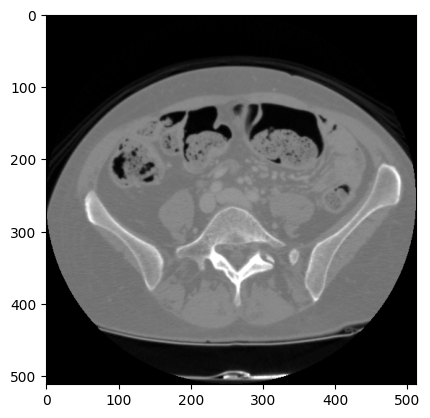

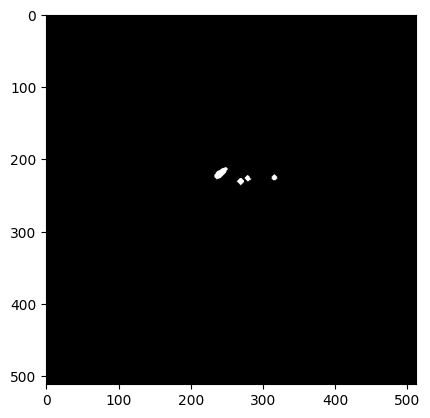

In [3]:
import utils.notebooks as nb

train_features, train_labels = next(iter(train_dataloader))
print(f'inputs shape: {train_features.shape}')
print(f'labels shape: {train_labels.shape}')
feat1, label1 = train_features[0], train_labels[0]
print(f'inputs type: {feat1.dtype}')
print(f'labels type: {label1.dtype}')

nb.show(feat1[0])
nb.show(label1[0])

In [4]:
from tqdm import tqdm

model = models.get_model.get_arch('wnet', in_c=1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = torch.nn.CrossEntropyLoss()

for data in tqdm(iter(train_dataloader)):
    inputs, labels = data
    input = inputs
    label = labels

    optimizer.zero_grad()

    out1, output = model(input)
    loss = criterion(output, label)

    loss.backward()
    optimizer.step()


  0%|          | 0/2 [00:05<?, ?it/s]


RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [10, 1, 91, 512, 512]

In [ ]:
torch.save(model, 'models/first_model.pt')

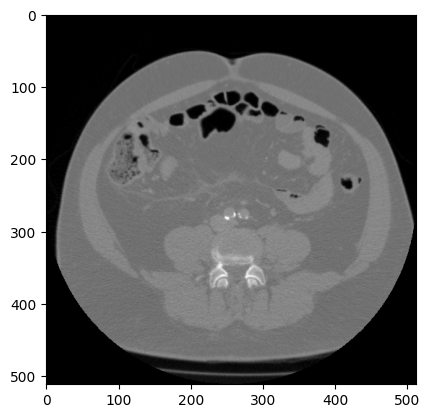

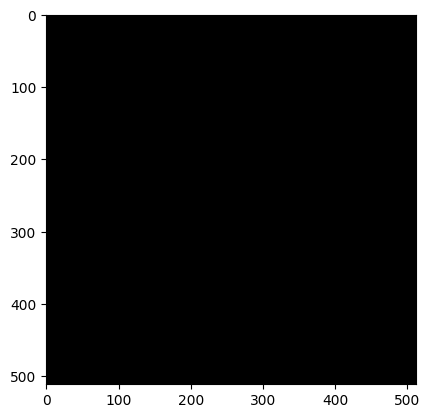

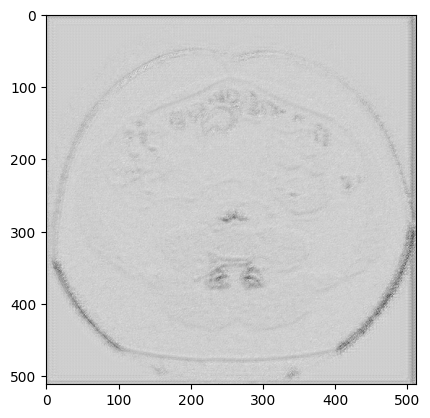

In [ ]:
test_data = DicomDataset3D("data/test.csv")
test_dataloader = DataLoader(test_data, batch_size=10)

train_features, train_labels = next(iter(test_dataloader))

nb.show(train_features[0])
nb.show(train_labels[0])
with torch.no_grad():
    _, pred = model(train_features)
    nb.show(pred[0])